<a href="https://colab.research.google.com/github/AbdiR0099/pytorch_neural_network_classification/blob/main/PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data

In [ ]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000
X , y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
print(f"First 10 elements of X:\n{X[:10]}")
print(f"First 10 elements of y:\n{y[:10]}")

First 10 elements of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]
First 10 elements of y:
[1 1 1 1 0 1 1 1 1 0]


In [ ]:
# Make DataFrame
import pandas as pd
circles = pd.DataFrame({"X1" : X[:,0],
                         "X2" : X[:,1],
                         "Labels" : y})
circles.head(10)

,X1,X2,Labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.Labels.value_counts()
# 500 blue circles i.e. rows with value 1 in Labels 1 column = 500
# Similar for red circles

,count
Labels,
1,500
0,500


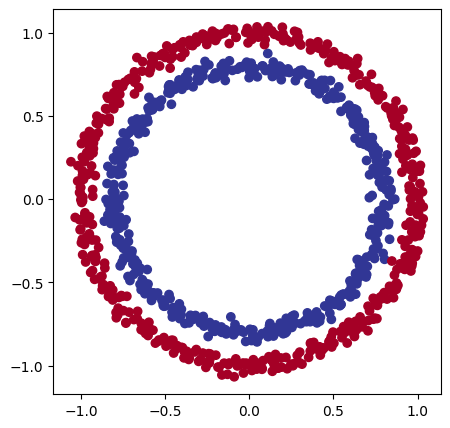

In [ ]:
# Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap = "RdYlBu")
plt.show() # To show the graph properly (Hiding <matplotlib.collections.PathCollection at 0x7aadea73ae00> )

**Toy Dataset:**
A dataset that is small enough to experiment but sizeable enough to practice the fundamentals.

## Checking Input and Output Shapes


In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

### Turn Data into Tensors & Split Training and Testing Data

In [ ]:
X.dtype,type(X)

(dtype('float64'), numpy.ndarray)

In [ ]:
import torch
torch.__version__

'2.5.1+cu121'

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
# torch.float to bring data to default float dtype tensors

In [ ]:
X.dtype,y.dtype

(torch.float32, torch.float32)

In [ ]:
type(X),type(y)

(torch.Tensor, torch.Tensor)

Now that the data has been turned into tensors, It is time to do training and testing split, for this sklearn will provide a function

In [ ]:
from sklearn.model_selection import train_test_split
""" Below is the synxtax and must be followed"""
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2, # 0.2 is 20% as in 20% will be testing data
                                                 random_state=42 # Splits Data randomly, Hence randomness has to be flavoured
)

In [ ]:
n_samples,len(X_train),len(X_test),len(y_train),len(y_test) # Data is split into 80% Training, 20% Testing

(1000, 800, 200, 800, 200)

## Build a Model

1. Setup device agnostic mode such that it uses an accelerator (GPU) when available
2. Construct a Model (subclassing by nn.Module)
3. Setup loss and optimizer for the model
4. Training & Testing loop

In [ ]:
import torch
from torch import nn

# 1. Setup agnostic mode
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
X_train.shape,y[:5]

(torch.Size([800, 2]), tensor([1., 1., 1., 1., 0.]))

In [ ]:
# 1. Construct a Model subclassing nn.Module
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
  # 2. Create 2 nn.Linear Layers to handle the shapes of the data
    self.layer_1 = nn.Linear(in_features=2,out_features=8) # Takes in 2 features and upscales to 8 features such that the model can learn from 8 features instead of 2 (ML uses multiple of 8 for computer hardware optimization)
    self.layer_2 = nn.Linear(in_features=8,out_features=1) # Takes in previous layer features and outputs accordingly to the shape of y. 1 value of y is the outcome from original 2 features of X
  # 3. Define forward()
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2

# 4. Create model instance
model = CircleModel()
model.to(device)
model,next(model.parameters()).device

(CircleModel(
   (layer_1): Linear(in_features=2, out_features=8, bias=True)
   (layer_2): Linear(in_features=8, out_features=1, bias=True)
 ),
 device(type='cpu'))

## Using nn.Sequential to create the model

There are two ways.
1. Create the model as above and make changes within the layers section such that we have our own custom class with nn.Sequential layers
2. Create the model directly without creating the class

In [ ]:
# 1. Creating the model in a class that subclasses from nn.Module
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    # Creating the Squential layer
    self.two_layers = nn.Sequential(nn.Linear(in_features=2,out_features=8),
                                    nn.Linear(in_features=8,out_features=1)
                                    )
  def forward(self,x):
    return self.two_layers(x)

model = CircleModel()
model

CircleModel(
  (two_layers): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [ ]:
# 2. Create the model directly
model = nn.Sequential(nn.Linear(in_features=2,out_features=8),
                      nn.Linear(in_features=8,out_features=1)).to(device)
model,next(model.parameters()).device

(Sequential(
   (0): Linear(in_features=2, out_features=8, bias=True)
   (1): Linear(in_features=8, out_features=1, bias=True)
 ),
 device(type='cpu'))

In [ ]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3075, -0.6215],
                      [ 0.5200, -0.1841],
                      [-0.5205, -0.3693],
                      [-0.1878,  0.6872],
                      [-0.3435, -0.1448],
                      [-0.3130,  0.0009],
                      [-0.1176, -0.3506],
                      [ 0.2035,  0.3326]])),
             ('0.bias',
              tensor([-0.1030, -0.5510, -0.5358,  0.5185, -0.0377,  0.4064,  0.0577, -0.1644])),
             ('1.weight',
              tensor([[ 0.0455,  0.0232,  0.2178,  0.1053, -0.1505,  0.0048,  0.0924, -0.1738]])),
             ('1.bias', tensor([0.0500]))])

## Setting up loss and optimizer

1. For regression, predicting a number, MAE (mean absolute error) or MSE (mean squared error) are common metrics to judge the model. i.e. nn.L1loss
2. For classification, predicting a class or a thing, binary cross entropy loss or cross entropy loss (multiclassification) are commonly used.

Loss function calculates how wrong the predictions are from actual values (ground true labels).

For optimizers, two of the most common and usefull are SGD and Adam.

In [ ]:
loss_fn = torch.nn.BCELoss # requires inputs to be passed through a sigmoid activation function before going as inputs to nn.BCEloss
loss_fn = torch.nn.BCEWithLogitsLoss() # sigmoid activation function built-in
loss_fn

BCEWithLogitsLoss()

In [ ]:
optimizer = torch.optim.SGD(lr = 0.1, params = model.parameters())

In [ ]:
# Calculate Accuracy - out of 100 samples, what percentage does that model predict correctly?
def accuracy(y_true,y_preds):
  correct = torch.eq(y_true,y_preds).sum().item() # torch.eq = how many of y_true samples are equal to y_preds? item() to get it as a single value
  acc = (correct/len(y_preds)) * 100
  return acc

## Train Model

In [ ]:
# Put the data on the same device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [ ]:
X_train.shape,y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

## Going from raw **Logits** to Prediction Probabilities to Prediction Labels

To convert **logits** into **prediction probabilities**, they are passed through an activation function (sigmoid for binary classification and softmax for multiclass classification)

Then, the probabilities are rounded up (for binary classification) or argmax() for softmax to get **prediction labels**.

In [ ]:
# logits -> prediction probabilties -> prediction labels
y_labels = torch.round(torch.sigmoid(model(X_train))) # sigmoid to make logits into prediction probabilities and then rounding them to make prediction labels

In [ ]:
### Training and Testing Loop
torch.cuda.manual_seed(42)
torch.manual_seed(42)

epochs = 1001 # Increasing number of epochs (fit for longer)

for epoch in range(epochs):
  ## Training Mode
  model.train()
  # 1. Forward pass
  y_logits = model(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits)) # turn logits -> prediction probs -> prediction labels
  # 2. Calculate loss/accuracy
  acc = accuracy(y_true = y_train, y_preds=y_preds)
  loss = loss_fn(y_logits, # nn.BCEwithLogitsLoss expects raw logits as input as it already contains an inbuilt sigmoid(activation fn)
                 y_train)
  # 3. Optimizer Zero Grad
  optimizer.zero_grad()
  # 4. Loss Backpropagation (Backward)
  loss.backward()
  # 5. Optimizer Step (gradient descent)
  optimizer.step()

  ## Testing Mode
  model.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    testing_logits = model(X_test).squeeze()
    testing_preds = torch.round(torch.sigmoid(testing_logits))

    # 2. Calculate loss/accuracy
    testing_loss = loss_fn(testing_logits,
                           y_test)
    test_acc = accuracy(y_true = y_test ,
                        y_preds = testing_preds )

  ## Print out what's happening
  if epoch % 200 == 0:
    print(f"Epoch: {epoch}\nTraining Loss: {loss:.5f} | Training Accuracy: {acc:.2f}%\nTesting Loss: {testing_loss:.5f} | Testing Accuracy: {test_acc:.2f}%\n") #:.5f only prints upto 5 decimal points




Epoch: 0
Training Loss: 0.69552 | Training Accuracy: 49.62%
Testing Loss: 0.69107 | Testing Accuracy: 52.00%

Epoch: 200
Training Loss: 0.69299 | Training Accuracy: 51.00%
Testing Loss: 0.69439 | Testing Accuracy: 47.00%

Epoch: 400
Training Loss: 0.69298 | Training Accuracy: 51.50%
Testing Loss: 0.69467 | Testing Accuracy: 44.50%

Epoch: 600
Training Loss: 0.69298 | Training Accuracy: 51.12%
Testing Loss: 0.69468 | Testing Accuracy: 45.50%

Epoch: 800
Training Loss: 0.69298 | Training Accuracy: 51.00%
Testing Loss: 0.69468 | Testing Accuracy: 46.00%

Epoch: 1000
Training Loss: 0.69298 | Training Accuracy: 51.00%
Testing Loss: 0.69468 | Testing Accuracy: 46.00%



## Model & Metrics
The model seems to be making no improvements. Therefore, let's visualize.

To visualize, let's download helper functions from the github repo.


In [ ]:
# Download RAW code file that contains the helper_functions
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper Functions Already Exist, Skipping Download.")
else:
  print("Downloading helper_functions.py")
  request  = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

# Check if helper_functions have been imported
from helper_functions import plot_predictions, plot_decision_boundary

[]

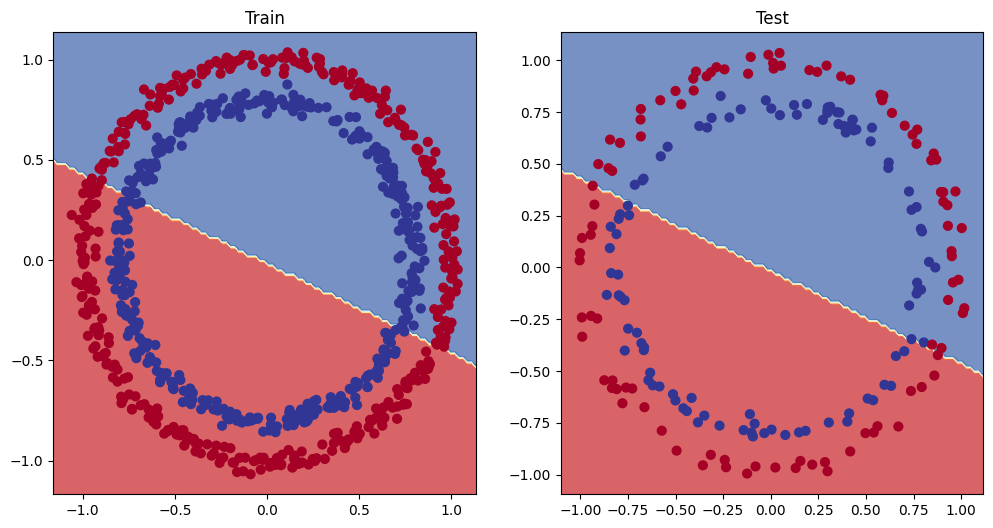

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) # 1 row 2 columns 1st postion
plot_decision_boundary(model,X_train,y_train)
plt.title("Train")
plt.subplot(1,2,2) # 1 row 2 columns 2nd position
plt.title("Test")
plot_decision_boundary(model,X_test,y_test)
plt.plot()

## Improving the model (from a model's prespective):

1. Adding more layers (Giving the model more chances to identify & learn patterns)
2. Adding more hidden units (increasing from 8 to 16 or more (in present scenario))
3. Fit for longer (increasing numbers of epochs)
4. Changing the loss function
5. Changing the learning rate
6. Changing the activation functions

These options are from model's prespective because it deals directly with the model instead of the data.

These options can be reffered to as **hyperparameters** because these can be changed by machine learning engineers or data scientists.

In [ ]:
class Circle(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(nn.Linear(in_features=2,out_features=16), # Adding more layers (1 layer added)
                              nn.Linear(in_features=16,out_features=16), # Adding more hidden units 8 -> 16
                              nn.Linear(in_features=16,out_features=1))
  def forward(self,x):
    return self.layer(x)

In [ ]:
model = Circle().to(device)
model,next(model.parameters()).device

(Circle(
   (layer): Sequential(
     (0): Linear(in_features=2, out_features=16, bias=True)
     (1): Linear(in_features=16, out_features=16, bias=True)
     (2): Linear(in_features=16, out_features=1, bias=True)
   )
 ),
 device(type='cpu'))

In [ ]:
# Set up loss function
loss_fn = nn.BCEWithLogitsLoss()
# Set up optimizer
optimizer = torch.optim.Adam(lr = 0.001, params = model.parameters()) # Learning Rate changed

In [ ]:
# Training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1001 # Fit for longer (Adding more epochs) // Train for longer

for epoch in range(epochs):
  # Training mode
  model.train()
  # 1. Forward pass
  y_logits = model(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits,y_train)
  acc = accuracy(y_true=y_train,y_preds=y_preds)
  # 3. Optimizer Zero Grad
  optimizer.zero_grad()
  # 4. Loss Backward (Backpropagation)
  loss.backward()
  # 5. Optimizer Step (Gradient Descent)
  optimizer.step()

  # Testing mode
  model.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits,y_test)
    test_acc =   accuracy(y_true=y_test,y_preds=test_preds)
  # Print out what's happening
  if epoch % 200 == 0:
    print(f"Epoch: {epoch}\nTraining Loss: {loss:.5f} | Training Accuracy: {acc:.2f}%\nTesting Loss: {test_loss:.5f} | Testing Accuracy: {test_acc:.2f}%")

Epoch: 0
Training Loss: 0.69618 | Training Accuracy: 50.00%
Testing Loss: 0.69327 | Testing Accuracy: 50.00%
Epoch: 200
Training Loss: 0.69298 | Training Accuracy: 51.00%
Testing Loss: 0.69468 | Testing Accuracy: 46.00%
Epoch: 400
Training Loss: 0.69298 | Training Accuracy: 51.00%
Testing Loss: 0.69468 | Testing Accuracy: 46.00%
Epoch: 600
Training Loss: 0.69298 | Training Accuracy: 51.00%
Testing Loss: 0.69468 | Testing Accuracy: 46.00%
Epoch: 800
Training Loss: 0.69298 | Training Accuracy: 51.00%
Testing Loss: 0.69468 | Testing Accuracy: 46.00%
Epoch: 1000
Training Loss: 0.69298 | Training Accuracy: 51.00%
Testing Loss: 0.69468 | Testing Accuracy: 46.00%


[]

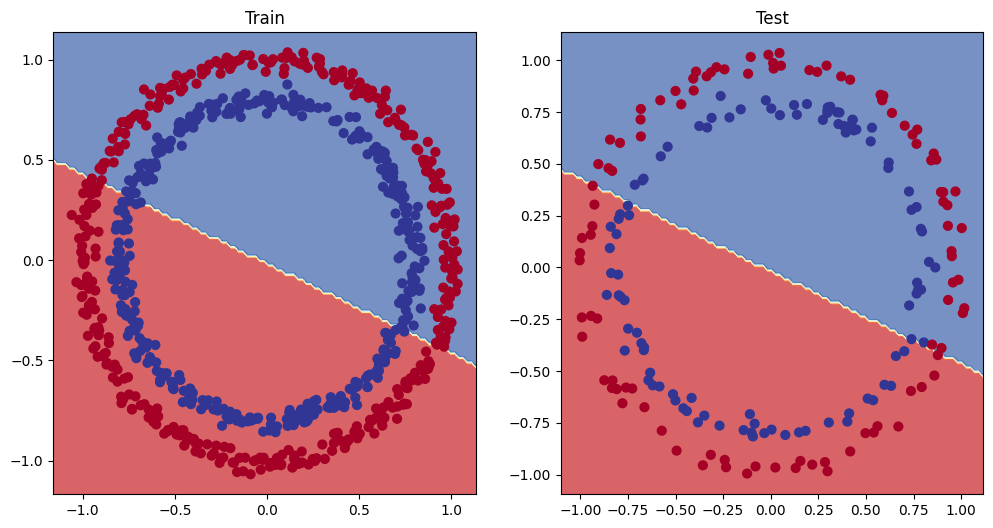

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) # 1 row 2 columns 1st postion
plot_decision_boundary(model,X_train,y_train)
plt.title("Train")
plt.subplot(1,2,2) # 1 row 2 columns 2nd position
plt.title("Test")
plot_decision_boundary(model,X_test,y_test)
plt.plot()

## Testing the model on Linear (Straight Line) Data

In [ ]:
# Checking model with a straight line
### Make the model in_features 1 // out_features = 1
bias = 0.3
weight = 0.5

start = 0
end = 1
step = 0.02

A = torch.arange(start,end,step).unsqueeze(dim=1)
B = weight * A + bias
A[:5],B[:5] # Print 5 values

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3100],
         [0.3200],
         [0.3300],
         [0.3400]]))

In [ ]:
s = int(len(A)*0.8)
A_train,A_test = A[:s],A[s:]
B_train,B_test = B[:s],B[s:]
len(A_train),len(A_test),len(B_train),len(B_test),A_train.shape,B_train.shape

(40, 10, 40, 10, torch.Size([40, 1]), torch.Size([40, 1]))

Epoch: 0
Training Loss: 0.23533
Testing Loss: 0.54275
Epoch: 200
Training Loss: 0.02640
Testing Loss: 0.00185
Epoch: 400
Training Loss: 0.01944
Testing Loss: 0.00400
Epoch: 600
Training Loss: 0.01731
Testing Loss: 0.00225
Epoch: 800
Training Loss: 0.01642
Testing Loss: 0.00344
Epoch: 1000
Training Loss: 0.01720
Testing Loss: 0.00386


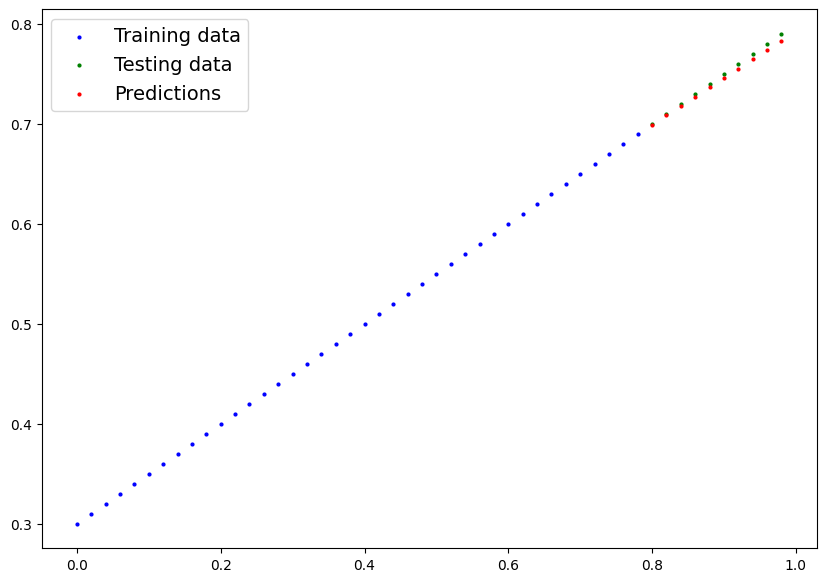

In [ ]:
# Create model
model = nn.Sequential(nn.Linear(in_features=1,out_features=8),
                      nn.Linear(in_features=8,out_features=8),
                      nn.Linear(in_features=8,out_features=1))
# Straight line
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(lr = 0.01, params = model.parameters())
# Training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1001 # Fit for longer (Adding more epochs) // Train for longer

for epoch in range(epochs):
  # Training mode
  model.train()
  # 1. Forward pass
  y_preds = model(A_train)

  # y_preds = torch.round(torch.sigmoid(y_logits))
  # 2. Calculate loss/accuracy
  loss = loss_fn(y_preds,B_train)
  #acc = accuracy(y_true=B_train,y_preds=y_preds)
  # 3. Optimizer Zero Grad
  optimizer.zero_grad()
  # 4. Loss Backward (Backpropagation)
  loss.backward()
  # 5. Optimizer Step (Gradient Descent)
  optimizer.step()

  # Testing mode
  model.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_preds = model(A_test)
    #test_preds = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_preds,B_test)
   # test_acc =   accuracy(y_true=B_test,y_preds=test_preds)
  # Print out what's happening
  if epoch % 200 == 0:
    print(f"Epoch: {epoch}\nTraining Loss: {loss:.5f}\nTesting Loss: {test_loss:.5f}")

plot_predictions(train_data=A_train.cpu(),train_labels=B_train.cpu(),test_data=A_test.cpu(),test_labels=B_test.cpu(),predictions=test_preds.cpu())

## Missing piece of the puzzle

What patterns can you make using infinite linear and non-linear lines?

In machine learning, using infinite (Finitie in reality) number of linear and non-linear functions?

* Linear = Straight line
* Non-Linear = Non-Straight line

Artificial neural networds are a large combination of linear and non-linear functions which are potentially able to find patterns within the data.

In [ ]:
model = nn.Sequential(nn.Linear(in_features=2,out_features=100),
                      nn.ReLU(),
                      nn.Linear(in_features=100,out_features=100),
                      nn.ReLU(),
                      nn.Linear(in_features=100,out_features=1),
                      ) # ReLU is a non linear activation function
model.to(device),next(model.parameters()).device

(Sequential(
   (0): Linear(in_features=2, out_features=100, bias=True)
   (1): ReLU()
   (2): Linear(in_features=100, out_features=100, bias=True)
   (3): ReLU()
   (4): Linear(in_features=100, out_features=1, bias=True)
 ),
 device(type='cpu'))

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(lr = 0.01, params = model.parameters())

In [ ]:
X_train.shape,y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
# Flavor Randomness
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
  # Training Mode
  model.train()
  # 1. Forward Pass
  y_logits = model(X_train).squeeze() # Remove 1 dimension
  y_preds = torch.round(torch.sigmoid(y_logits))
  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits,y_train)
  acc = accuracy(y_true = y_train, y_preds = y_preds)
  # 3. Optimizer Zero Grad
  optimizer.zero_grad()
  # 4. Loss Backward (Backpropagation)
  loss.backward()
  # 5. Optimizer Step (Gradient Descent)
  optimizer.step()

  # Testing Mode
  model.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    test_logits = model(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy(y_true = y_test, y_preds = test_preds)

  # Print What's Happening
  if epoch % 200 == 0:
    print(f"Epoch: {epoch}\nTraining Loss: {loss:.5f} | Training Accuracy: {acc:.2f}%\nTesting Loss: {test_loss:.5f} | Testing Accuracy: {test_acc:.2f}%\n")

Epoch: 0
Training Loss: 0.69218 | Training Accuracy: 50.38%
Testing Loss: 0.68175 | Testing Accuracy: 70.00%

Epoch: 200
Training Loss: 0.00037 | Training Accuracy: 100.00%
Testing Loss: 0.00335 | Testing Accuracy: 100.00%

Epoch: 400
Training Loss: 0.00014 | Training Accuracy: 100.00%
Testing Loss: 0.00206 | Testing Accuracy: 100.00%

Epoch: 600
Training Loss: 0.00008 | Training Accuracy: 100.00%
Testing Loss: 0.00153 | Testing Accuracy: 100.00%

Epoch: 800
Training Loss: 0.00005 | Training Accuracy: 100.00%
Testing Loss: 0.00119 | Testing Accuracy: 100.00%



[]

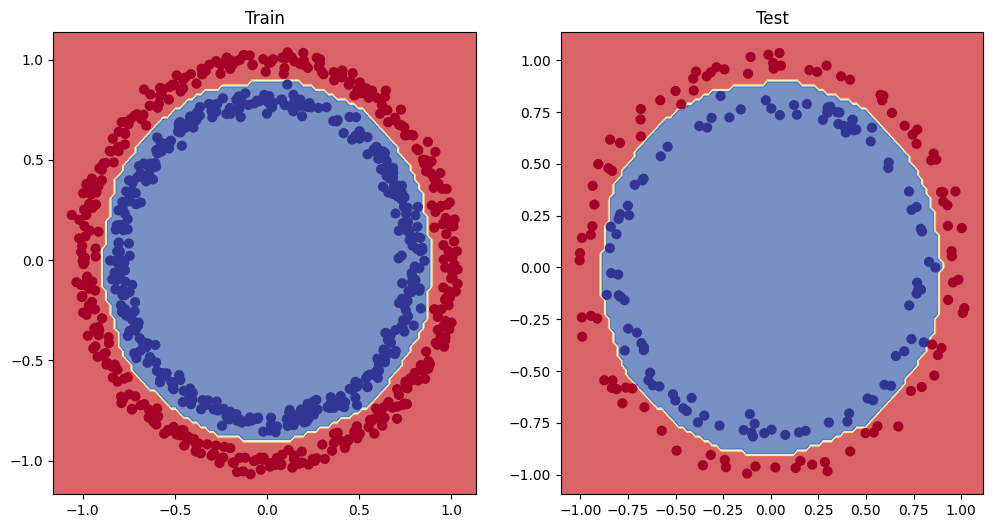

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,X_test,y_test)
plt.plot()

## Multiclass Classification

* Binary Classification: (Cat vs Dog, Spam vs Not Spam, Fraud vs Not Fraud)
* Multiclass Classification (Pizza vs Sushi vs Hotdogs, Cat vs Dog vs Bird)


[]

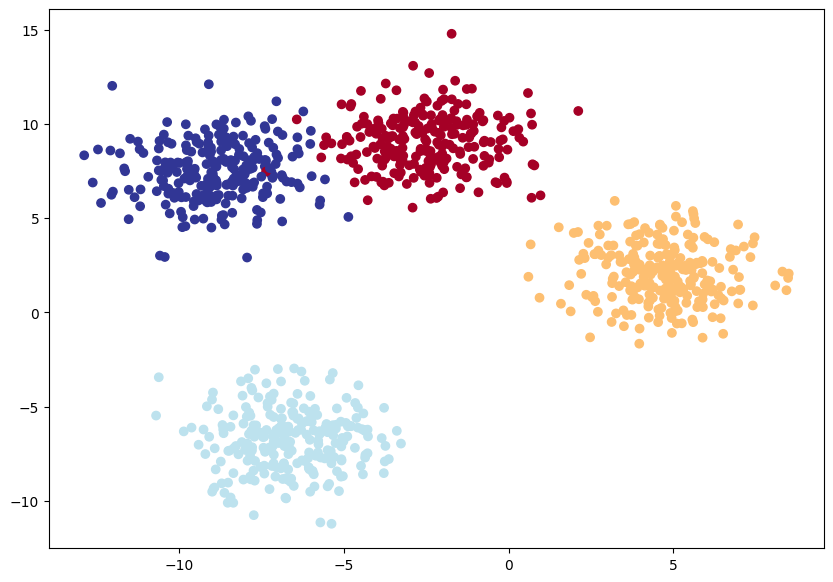

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# 1. Create HyperParameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
HIDDEN_UNITS = 8

# 2. Create Data
X_blob,y_blob = make_blobs(n_samples = 1000,
                           n_features= NUM_FEATURES,
                           centers = NUM_CLASSES,
                           cluster_std = 1.5,
                           random_state = RANDOM_SEED)
X_blob,y_blob = torch.from_numpy(X_blob).type(torch.float),torch.from_numpy(y_blob).type(torch.long)

# 3. Split Data
X_train,X_test,y_train,y_test = train_test_split(X_blob,
                                                 y_blob,
                                                 random_state=RANDOM_SEED,
                                                 test_size = 0.2)
# 4. Visualize Data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap="RdYlBu")
plt.plot()

In [ ]:
# Device Agnostic Code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
model = nn.Sequential(nn.Linear(in_features = NUM_FEATURES, out_features = HIDDEN_UNITS),
                      nn.ReLU(),
                      nn.Linear(in_features=HIDDEN_UNITS,out_features=HIDDEN_UNITS*2),
                      nn.ReLU(),
                      nn.Linear(in_features=HIDDEN_UNITS*2,out_features=NUM_CLASSES),
                      nn.ReLU())

In [ ]:
## Sending Data and Model to GPU
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)
model = model.to(device)
print(f"X_train device: {X_train.device}\ny_train device: {y_train.device}\nX_test device: {X_test.device}\ny_test device: {y_test.device}\nModel device: {next(model.parameters()).device}")

X_train device: cpu
y_train device: cpu
X_test device: cpu
y_test device: cpu
Model device: cpu


In [ ]:
X_train.shape,y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
# Set up Loss & Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lr = 0.01, params = model.parameters())

In [ ]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

epochs = 1000

for epoch in range(epochs):
  # Training Mode
  model.train()
  # 1. Forward pass
  y_logits = model(X_train).squeeze()
  y_preds = torch.argmax(torch.softmax(y_logits,dim=1),dim=1)
  # 2. Loss Calculation / Accuracy
  loss = loss_fn(y_logits,y_train) # requires input logits and target (y_train)
  aac = accuracy(y_true = y_train, y_preds = y_preds)
  # 3. Optimizer Zero Grad
  optimizer.zero_grad()
  # 4. Loss Backward (Backpropagation)
  loss.backward()
  # 5. Optimizer Step (Gradient Descent)
  optimizer.step()

  # Testing Mode
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_preds = torch.argmax(torch.softmax(test_logits,dim=1),dim=1)
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy(y_true = y_test, y_preds = test_preds)

  if epoch % 200 == 0:
    print(f"Epoch: {epoch}\nTraining Loss: {loss:.5f} | Training Accuracy: {aac:.2f}%\nTesting Loss: {test_loss:.5f} | Testing Accuracy: {test_acc:.2f}%\n")

Epoch: 0
Training Loss: 1.43440 | Training Accuracy: 29.00%
Testing Loss: 1.44060 | Testing Accuracy: 25.00%

Epoch: 200
Training Loss: 0.72978 | Training Accuracy: 81.38%
Testing Loss: 0.73003 | Testing Accuracy: 83.50%

Epoch: 400
Training Loss: 0.22897 | Training Accuracy: 99.00%
Testing Loss: 0.23615 | Testing Accuracy: 99.50%

Epoch: 600
Training Loss: 0.07495 | Training Accuracy: 99.12%
Testing Loss: 0.06945 | Testing Accuracy: 99.50%

Epoch: 800
Training Loss: 0.04556 | Training Accuracy: 99.12%
Testing Loss: 0.03770 | Testing Accuracy: 99.50%



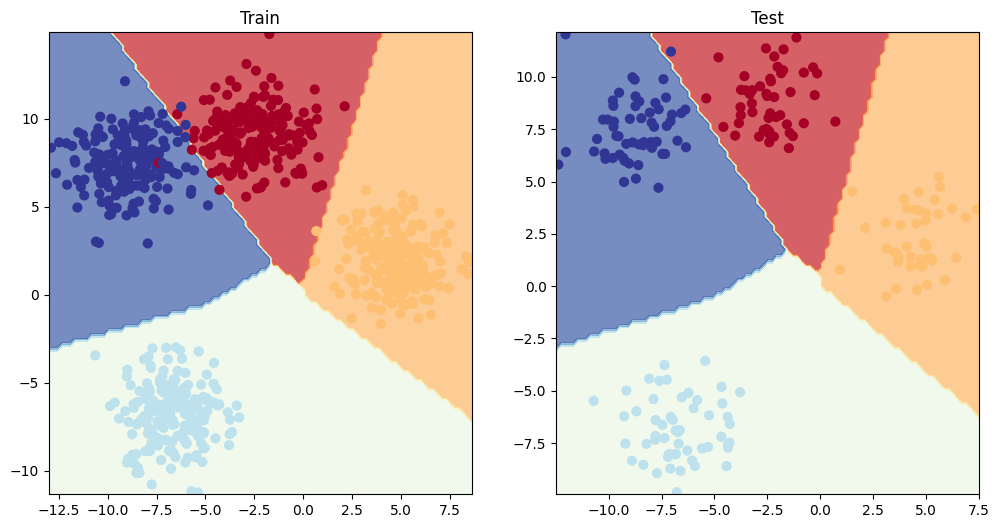

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,X_test,y_test)

# Exercise

1. Make a binary classification dataset with Scikit-Learn's make_moons() function.
* For consistency, the dataset should have 1000 samples and a random_state=42.
* Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import matplotlib.pyplot as plt

X,y = make_moons(n_samples = 1000,
                 noise = 0.05,
                 random_state = 42)
X,y = torch.from_numpy(X).type(torch.float),torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

[]

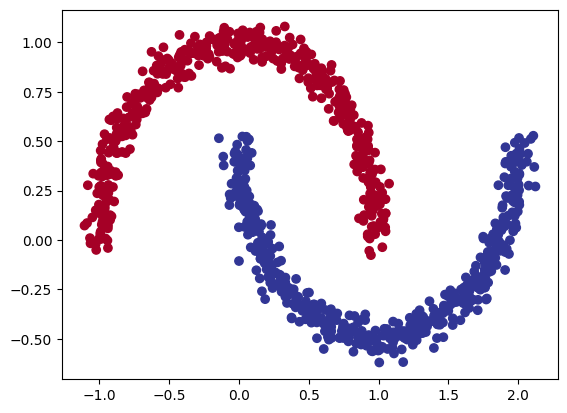

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap="RdYlBu")
plt.plot()

In [ ]:
X[:5],y[:5]

(tensor([[-0.0214,  0.4062],
         [ 0.9767, -0.4583],
         [ 0.9041, -0.3765],
         [ 0.3774, -0.3970],
         [-0.8419,  0.5306]]),
 tensor([1., 1., 1., 1., 0.]))

2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
* Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [ ]:
model = nn.Sequential(nn.Linear(in_features=2,out_features=100),
                      nn.ReLU(),
                      nn.Linear(in_features=100,out_features=100),
                      nn.ReLU(),
                      nn.Linear(in_features=100,out_features=1)
                      )
model

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=1, bias=True)
)

3. Setup a binary classification compatible loss function and optimizer to use when training the model.

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(lr = 0.01, params = model.parameters()) # Using Adam optimizer here makes all the difference

4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
* To measure model accuracy, you can create your own accuracy function or use the accuracy function in TorchMetrics.
* Train the model for long enough for it to reach over 96% accuracy.
* The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [ ]:
def accuracy(y_true,y_preds):
  correct = torch.eq(y_true,y_preds).sum().item()
  acc = (correct/len(y_preds)) * 100
  return acc


In [ ]:
epochs = 100

torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in range(epochs):
  # Training mode
  model.train()
  # 1. Forward pass
  y_logits = model(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits,y_train)
  acc = accuracy(y_true = y_train, y_preds = y_preds)
  # 3. Optimizer Zero Grad
  optimizer.zero_grad()
  # 4. Loss Backward (Backpropagation)
  loss.backward()
  # 5. Optimizer Step (Gradient Descent)
  optimizer.step()

  # Testing mode
  model.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy(y_true = y_test, y_preds = test_preds)

  if epoch == 0 or epoch % 10 == 0:
    print(f"Epoch: {epoch}\nTraining Loss: {loss:.5f} | Training Accuracy: {acc:.2f}%\nTesting Loss: {test_loss:.5f} | Testing Accuracy: {test_acc:.2f}%\n")

Epoch: 0
Training Loss: 0.69756 | Training Accuracy: 39.38%
Testing Loss: 0.58311 | Testing Accuracy: 76.50%

Epoch: 10
Training Loss: 0.20790 | Training Accuracy: 89.12%
Testing Loss: 0.17580 | Testing Accuracy: 92.00%

Epoch: 20
Training Loss: 0.06613 | Training Accuracy: 97.75%
Testing Loss: 0.04891 | Testing Accuracy: 98.50%

Epoch: 30
Training Loss: 0.01024 | Training Accuracy: 100.00%
Testing Loss: 0.00857 | Testing Accuracy: 100.00%

Epoch: 40
Training Loss: 0.00207 | Training Accuracy: 100.00%
Testing Loss: 0.00158 | Testing Accuracy: 100.00%

Epoch: 50
Training Loss: 0.00083 | Training Accuracy: 100.00%
Testing Loss: 0.00056 | Testing Accuracy: 100.00%

Epoch: 60
Training Loss: 0.00040 | Training Accuracy: 100.00%
Testing Loss: 0.00033 | Testing Accuracy: 100.00%

Epoch: 70
Training Loss: 0.00030 | Training Accuracy: 100.00%
Testing Loss: 0.00025 | Testing Accuracy: 100.00%

Epoch: 80
Training Loss: 0.00022 | Training Accuracy: 100.00%
Testing Loss: 0.00018 | Testing Accuracy:

5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

[]

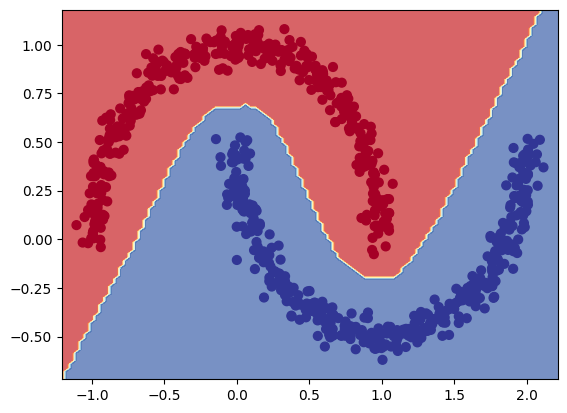

In [ ]:
plot_decision_boundary(model,X_train,y_train)
plt.plot()

6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

* Feel free to reference the ML cheatsheet website for the formula.

In [ ]:
A = torch.arange(-10,10,1)
A,A.shape

(tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
           4,   5,   6,   7,   8,   9]),
 torch.Size([20]))

In [ ]:
def Tanh(x):
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x)) # Tanh Forumula

Tanh squashes a real-valued number to the range `[-1, 1]`. It’s non-linear. But unlike Sigmoid, its output is zero-centered. Therefore, in practice the tanh non-linearity is always preferred to the sigmoid nonlinearity.

[]

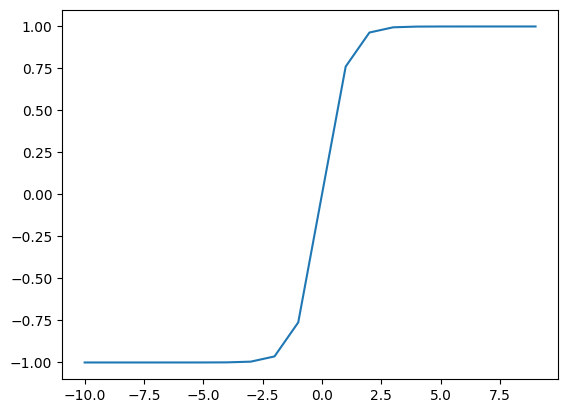

In [ ]:
plt.plot(A,Tanh(A)) # Look at y axis (-1,1)
plt.plot()

7.Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).
* Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
* Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
* Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
* Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

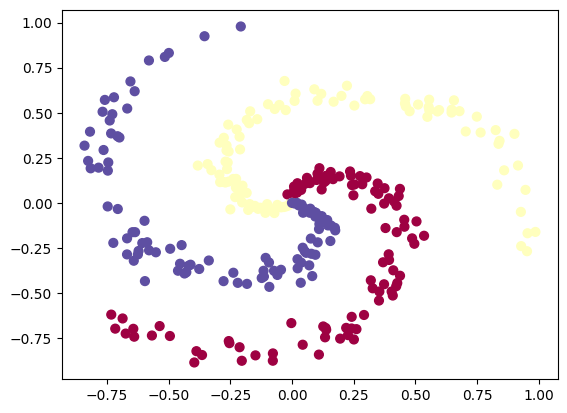

In [ ]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
# Turn Data in tensors
X,y = torch.from_numpy(X).type(torch.float),torch.from_numpy(y).type(torch.long) # Long here as loss function will expect integer instead of float
X[:5],y[:5]

(tensor([[-0.0000, 0.0000],
         [0.0007, 0.0101],
         [0.0011, 0.0202],
         [0.0025, 0.0302],
         [0.0039, 0.0402]]),
 tensor([0, 0, 0, 0, 0]))

In [ ]:
X.shape,y.shape

(torch.Size([300, 2]), torch.Size([300]))

In [ ]:
model = nn.Sequential(nn.Linear(in_features=2,out_features=100),
                      nn.ReLU(),
                      nn.Linear(in_features=100,out_features=100),
                      nn.ReLU(),
                      nn.Linear(in_features=100,out_features=K) # K is number of classes mentioned above
                      )
model

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=3, bias=True)
)

In [ ]:
# Split Training & Testing Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_test.shape,X_train.shape,y_test.shape,y_train.shape

(torch.Size([60, 2]),
 torch.Size([240, 2]),
 torch.Size([60]),
 torch.Size([240]))

In [ ]:
# Loss & Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lr = 0.01, params = model.parameters())

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):
  # Training mode
  model.train()
  # 1. Forward pass
  y_logits = model(X_train).squeeze()
  y_preds = torch.argmax(torch.softmax(y_logits,dim=1),dim=1) # Softmax is activation function for multiclass, argmax finds the index of highest value # dim = 1 lets it choose within the row
  # 2. loss
  loss = loss_fn(y_logits,y_train)
  acc = accuracy(y_true = y_train, y_preds = y_preds)
  # 3. Zero grad optimizer
  optimizer.zero_grad()
  # 4. Loss backward
  loss.backward()
  # 5. Optimizer step
  optimizer.step()

  # Testing mode
  model.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model(X_test).squeeze()
    test_preds = torch.argmax(torch.softmax(test_logits,dim=1),dim=1)
    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy(y_true = y_test, y_preds = test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch}\nTraining Loss: {loss:.5f} | Training Accuracy: {acc:.2f}%\nTesting Loss: {test_loss:.5f} | Testing Accuracy: {test_acc:.2f}%\n")

Epoch: 0
Training Loss: 0.06257 | Training Accuracy: 98.75%
Testing Loss: 0.03509 | Testing Accuracy: 100.00%

Epoch: 10
Training Loss: 0.06226 | Training Accuracy: 97.50%
Testing Loss: 0.01481 | Testing Accuracy: 100.00%

Epoch: 20
Training Loss: 0.03299 | Training Accuracy: 99.17%
Testing Loss: 0.00605 | Testing Accuracy: 100.00%

Epoch: 30
Training Loss: 0.02854 | Training Accuracy: 99.17%
Testing Loss: 0.00476 | Testing Accuracy: 100.00%

Epoch: 40
Training Loss: 0.02797 | Training Accuracy: 99.17%
Testing Loss: 0.00436 | Testing Accuracy: 100.00%

Epoch: 50
Training Loss: 0.02697 | Training Accuracy: 99.17%
Testing Loss: 0.00381 | Testing Accuracy: 100.00%

Epoch: 60
Training Loss: 0.02632 | Training Accuracy: 99.17%
Testing Loss: 0.00338 | Testing Accuracy: 100.00%

Epoch: 70
Training Loss: 0.02571 | Training Accuracy: 99.17%
Testing Loss: 0.00298 | Testing Accuracy: 100.00%

Epoch: 80
Training Loss: 0.02511 | Training Accuracy: 99.17%
Testing Loss: 0.00262 | Testing Accuracy: 10

[]

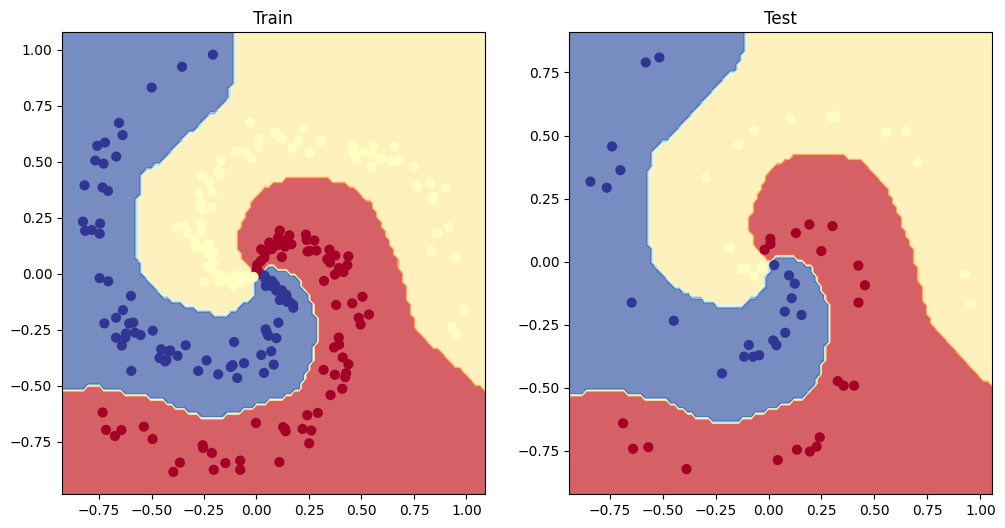

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,X_test,y_test)
plt.plot()